In [56]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
import itertools

warnings.simplefilter('ignore')

# Datasets
from sklearn import datasets

# Preprocessing
from sklearn.model_selection import train_test_split

# Model
from sklearn.linear_model import LinearRegression, Lasso, Ridge

# Evaluation
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score

In [57]:
# 讀取糖尿病資料集
diabetes = datasets.load_diabetes()
print(f"{len(diabetes.feature_names)} features: {diabetes.feature_names}")

# 轉成 DataFrame 比較方便觀察
diabetes_df = pd.DataFrame(diabetes.data, columns=diabetes.feature_names)
display(diabetes_df.head())

# 使用資料集中所有特徵作預測
X = diabetes_df # X 需要為一個 matrix
y = diabetes.target
print("X shape: ", X.shape)
print("y shape: ", y.shape)

# 切分訓練集/測試集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=4)

10 features: ['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']


,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641


X shape:  (442, 10)
y shape:  (442,)


### Ols

In [58]:
# 建立一個 Ols 模型
lin_reg = LinearRegression()

# 將訓練資料丟進去模型訓練
lin_reg.fit(X_train, y_train)

# 將測試資料丟進模型得到預測結果
y_pred = lin_reg.predict(X_test)
print('y_pred:\n', y_pred)

y_pred:
 [ 74.43391835  93.01109527 174.89737143  52.70087943 180.63167083
 145.29216855 112.87572919 121.31665469  86.80032197  72.09378757
 106.45223905 193.85629433 182.28244231 125.44954596 155.88807338
 139.16274427 176.97750299 119.391544   110.71450134 183.79586685
 215.37201852 181.15778329  58.74605273 228.82344172  54.2078642
 107.86621435 157.1596501  180.13320036  62.20538852  67.18498305
 190.81938489 118.09494234 260.89115016 183.19864659 105.60921861
 175.91776536 176.89214476 156.04517274 146.9267604  157.34264891
 198.17580795 168.02789586 237.98697647  71.33866228 237.45207957
 108.07352281 152.11732859  50.30628893 199.55743787 139.52692004
 110.45619532 101.52014142 154.91606348 228.90426313  54.52750793
 187.29002271 106.15579971  93.61499106 190.00654826 226.40047522
 124.53876748  97.0908313  168.71526129 249.76923806 120.97965421
 166.18303864 125.74890414 201.92319626 228.46151939 198.24974673
 146.03410277 163.99013963 162.38407362 212.78534323 162.6299936
 21

In [59]:
# 印出 Ols 回歸的係數與及截距
print(' Features\n', diabetes.feature_names)
print('\n Coeff.\n', lin_reg.coef_)
print('\n Intercept\n', lin_reg.intercept_)

# 回歸問題的衡量採用 MSE 及 R square
ols_mse = mean_squared_error(y_test, y_pred)
ols_r2 = r2_score(y_test, y_pred)
print('\n Intercept\n', ols_mse)
print('\n R square\n', ols_r2)

 Features
 ['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']

 Coeff.
 [  33.40877011 -292.24672884  481.07153405  369.06269614 -966.37849405
  589.81383056  232.61924401  288.3263166   802.72704593   37.81285219]

 Intercept
 151.1466076284935

 Intercept
 2939.416046645502

 R square
 0.46108829156873343


### Lasso regression

In [60]:
# 建立一個 Lasso 模型
lasso_reg = Lasso(alpha=1.0)

# 將訓練資料丟進去模型訓練
lasso_reg.fit(X_train, y_train)

# 將測試資料丟進模型得到預測結果
y_pred = lasso_reg.predict(X_test)

In [61]:
# 印出 Lasso 回歸的係數與及截距 (許多係數都變成 0，Lasso Regression 的矩陣稀疏性可以用作特徵選取)
print(' Features\n', diabetes.feature_names)
print('\n Coeff.\n', lasso_reg.coef_)
print('\n Intercept\n', lasso_reg.intercept_)

# 回歸問題的衡量採用 MSE 及 R square
lasso_mse = mean_squared_error(y_test, y_pred)
lasso_r2 = r2_score(y_test, y_pred)
print('\n Intercept\n', lasso_mse)
print('\n R square\n', lasso_r2)

 Features
 ['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']

 Coeff.
 [  0.          -0.         321.203877    57.74744332   0.
   0.          -0.           0.         332.41817196   0.        ]

 Intercept
 151.5850497350083

 Intercept
 3505.8375893028074

 R square
 0.35724072579318467


### Ridge regression

In [62]:
# 建立一個線性回歸模型
ridge_reg = Ridge(alpha=1.0)

# 將訓練資料丟進去模型訓練
ridge_reg.fit(X_train, y_train)

# 將測試資料丟進模型得到預測結果
y_pred = ridge_reg.predict(X_test)

In [63]:
# 印出 Ridge 回歸的係數與及截距 (許多係數都變小很多)
print(' Features\n', diabetes.feature_names)
print('\n Coeff.\n', ridge_reg.coef_)
print('\n Intercept\n', ridge_reg.intercept_)

# 回歸問題的衡量採用 MSE 及 R square
ridge_mse = mean_squared_error(y_test, y_pred)
ridge_r2 = r2_score(y_test, y_pred)
print('\n Intercept\n', ridge_mse)
print('\n R square\n', ridge_r2)

 Features
 ['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']

 Coeff.
 [  48.8125786   -85.49511577  270.22532535  201.91767903   17.41308665
  -19.04346706 -136.47737574  122.26503311  247.60074795   95.59855598]

 Intercept
 151.29747021571842

 Intercept
 3221.420945064198

 R square
 0.4093855930799496


可以看見 Lasso 與 Ridge 的結果並沒有比原本的線性回歸來得好，
這是因為目標函數被加上了正規化函數，讓模型不能過於複雜，相當於限制模型擬和資料的能力。因此若沒有發現 Over-fitting 的情況，是可以不需要一開始就加上太強的正規化的(將正則化改小可以改進預測能力)。

### 改變正則化強度
### Ols

In [64]:
alpha = [0.0001, 0.001, 0.01, 0.02, 0.05, 0.1, 0.2, 0.5, 1.0]
ols_mse = list(itertools.repeat(ols_mse, len(alpha)))
ols_r2 = list(itertools.repeat(ols_r2, len(alpha)))

### Lasso

In [65]:
lasso_mse = list()
lasso_r2 = list()

for a in alpha:
    # 建立一個 Lasso 模型
    lasso_reg = Lasso(alpha=a)

    # 將訓練資料丟進去模型訓練
    lasso_reg.fit(X_train, y_train)

    # 將測試資料丟進模型得到預測結果
    y_pred = lasso_reg.predict(X_test)

    # 回歸問題的衡量採用 MSE 及 R square
    lasso_mse.append(mean_squared_error(y_test, y_pred))
    lasso_r2.append(r2_score(y_test, y_pred))
print(lasso_mse)
print(lasso_r2)

[2938.8040696990065, 2933.449515397142, 2905.5964136990756, 2894.9769727505686, 2874.6075011088606, 2877.2277656320584, 2893.098479159996, 3055.788638830718, 3505.8375893028074]
[0.461200491249392, 0.46218219372393576, 0.4672887735285691, 0.4692357388350543, 0.47297027201718167, 0.4724898734589884, 0.4695801413198023, 0.4397525733601183, 0.35724072579318467]


### Ridge

In [66]:
ridge_mse = list()
ridge_r2 = list()

for a in alpha:
    # 建立一個 Lasso 模型
    ridge_reg = Ridge(alpha=a)

    # 將訓練資料丟進去模型訓練
    ridge_reg.fit(X_train, y_train)

    # 將測試資料丟進模型得到預測結果
    y_pred = ridge_reg.predict(X_test)

    # 回歸問題的衡量採用 MSE 及 R square
    ridge_mse.append(mean_squared_error(y_test, y_pred))
    ridge_r2.append(r2_score(y_test, y_pred))
print(ridge_mse)
print(ridge_r2)

[2938.5210435206636, 2931.7658329208916, 2908.779126160051, 2902.231303662525, 2895.3465400593013, 2894.5900186420854, 2911.6325146977647, 3019.0048396231155, 3221.420945064198]
[0.4612523811890539, 0.4624908795939634, 0.46670525592419754, 0.46790573185297035, 0.4691679824689704, 0.46930668289209754, 0.4661821164749752, 0.4464965047257323, 0.4093855930799496]


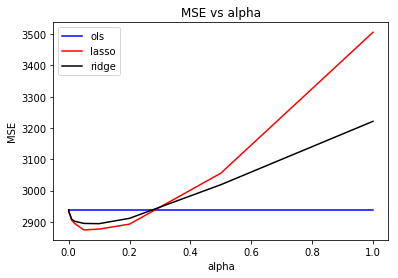

In [71]:
plt.plot(alpha, ols_mse, color='b', label='ols');
plt.plot(alpha, lasso_mse, color='r', label='lasso');
plt.plot(alpha, ridge_mse, color='k', label='ridge');
plt.xlabel('alpha'); plt.ylabel('MSE'); plt.legend(); plt.title('MSE vs alpha');

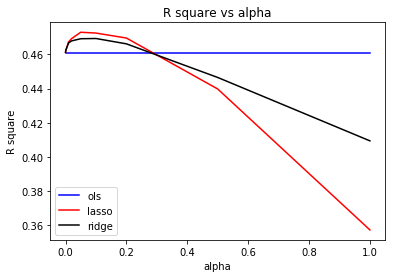

In [72]:
plt.plot(alpha, ols_r2, color='b', label='ols');
plt.plot(alpha, lasso_r2, color='r', label='lasso');
plt.plot(alpha, ridge_r2, color='k', label='ridge');
plt.xlabel('alpha'); plt.ylabel('R square'); plt.legend(); plt.title('R square vs alpha');

## 練習時間

請使用其他資料集 (boston, wine)，並調整不同的 alpha 來觀察模型訓練的情形。